In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [118]:
edge_list = []
with open('datasets\Cit-HepTh.txt','r') as f:
    for line in f.readlines():
        row = line.strip().split('\t')
        if not row[0].startswith('#'):
           edge_list.append((int(row[0]), int(row[1])))

In [68]:
with open('datasets\Cit-HepTh.txt', 'r') as file:
    edge_list = []
    for line in file:
        # skip lines that do not contain data
        if line.startswith('#'):
            continue
        
        # extract the numbers from the line as a tuple of integers
        edge = tuple(map(int, line.strip().split()))  #map(function, iter)
        edge_list.append(edge)

In [71]:
edge_list[:5]

[(1001, 9304045),
 (1001, 9308122),
 (1001, 9309097),
 (1001, 9311042),
 (1001, 9401139)]

In [72]:
len(edge_list)

352807

In [119]:
G = nx.Graph()
G.add_edges_from(edge_list)
#nx.draw_spring(G,with_labels=True)

In [131]:
G = nx.read_edgelist('datasets\Cit-HepTh.txt', comments='#', nodetype=int)

In [127]:

# Initialize max_degree to 0
max_degree = 0

# Iterate over the nodes and degrees in the graph
for node, degree in G.degree:

    # If the degree of the current node is greater than the current max_degree,
    # update max_degree and max_node accordingly
    if degree > max_degree:
        max_degree = degree
        max_node = node

# Print the node with the maximum degree and its degree
print("Node with maximum degree:", max_node)
print("Maximum degree:", max_degree)


Node with maximum degree: 9711200
Maximum degree: 2468


In [116]:
print(nx.density(G))

0.0009137683330762914


In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
giantC = G.subgraph(largest_cc)
nx.diameter(giantC)

In [ ]:
with open('datasets\Cit-HepTh.txt', 'r') as file:
    edge_list = []
    for line in file:
        # skip lines that do not contain data
        if line.startswith('#'):
            continue
        
        # extract the numbers from the line as a tuple of integers
        edge = tuple(map(int, line.strip().split()))  #map(function, iter)
        edge_list.append(edge)

G = nx.Graph()
G.add_edges_from(edge_list)

largest_cc = max(nx.connected_components(G), key=len)
giantC = G.subgraph(largest_cc)
nx.diameter(giantC)

In [ ]:
nx.average_shortest_path_length(giantC)

In [117]:
len(giantC.nodes)

27400

In [111]:
len(giantC.edges)

352059

In [112]:
nx.is_connected(G)

False

In [ ]:
sort_dict_by_value(nx.degree_centrality(G))

In [133]:
def max_degree_G(G):
    # Initialize max_degree to 0
    max_degree = 0

    # Iterate over the nodes and degrees in the graph
    for node, degree in G.degree:

        # If the degree of the current node is greater than the current max_degree,
        # update max_degree and max_node accordingly
        if degree > max_degree:
            max_degree = degree
            max_node = node
    return max_node, max_degree

In [134]:
def analysis_graph(path):
    G = nx.read_edgelist(path, comments='#', nodetype=int)
    max_node, max_degree = max_degree_G(G)
    print("Node with maximum degree:", max_node)
    print("Maximum degree:", max_degree)
    density = nx.density(G)
    print('density = ', density)

    if nx.is_connected(G) :
        diameter = nx.diameter(G)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G_cc)
        print('average_shortest_path_length =',average_shortest_path_length )

    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        diameter = nx.diameter(G_cc)
        print('diameter = ',diameter)
        average_shortest_path_length = nx.average_shortest_path_length(G_cc)

In [139]:
path = 'datasets\\facebook_combined.txt'
G = nx.read_edgelist(path, comments='#', nodetype=int)

In [141]:
nx.average_shortest_path_length(G)

3.6925068496963913

In [161]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
len(degree_sequence)

4039

In [166]:
average_degree = sum(degree_sequence)/len(degree_sequence)
average_degree

43.69101262688784

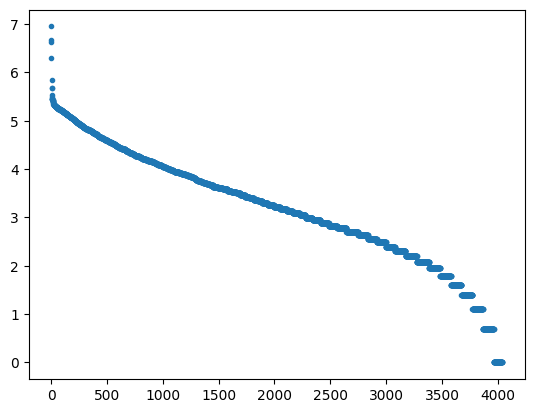

In [167]:
degree_sequence = sorted([d for n, d in G.degree()],reverse=True) 
plt.scatter(np.arange(len(degree_sequence)),np.log(degree_sequence),marker=".")

In [169]:
avg_clustering = nx.average_clustering(G)
transivity = nx.transitivity(G)
print('avg_clustering = ',avg_clustering)
print('transivity = ',transivity)

avg_clustering =  0.6055467186200876
transivity =  0.5191742775433075


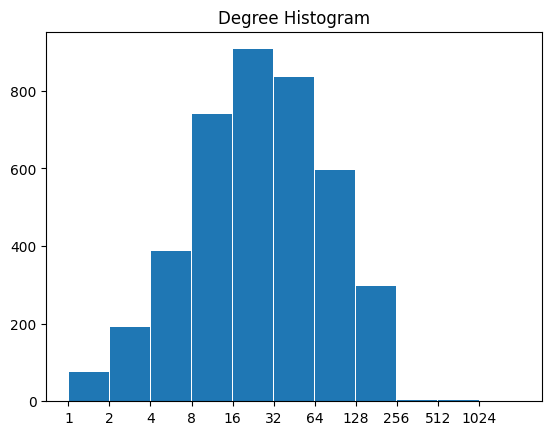

In [260]:
import collections
import matplotlib.pyplot as plt

degree_sequence = [int(np.log2(d)) for n, d in G.degree()]
degreeCount = collections.Counter(degree_sequence)

deg, cnt = degreeCount.keys(), degreeCount.values()

fig, ax = plt.subplots()
plt.bar(deg, cnt,width=0.99)
plt.title("Degree Histogram")
ax.set_xticks([d-0.5  for d in deg])
ax.set_xticklabels(np.power(2,list(deg)))
plt.show()